# Lab-2

Name: Purusharth Malik

Registration No.: 2348542

# Affine Transformations

In [40]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

def plot_image(img, title, og_im = cv2.cvtColor(cv2.imread('images/bird.png'), cv2.COLOR_BGR2RGB)):    
    fig, ax = plt.subplots(1, 2)
    # Plotting the original image
    ax[0].imshow(og_im)
    ax[0].axis('off')
    
    # Plotting the new image
    ax[1].imshow(img)
    ax[1].axis('off')
    plt.title(title)
    plt.show()

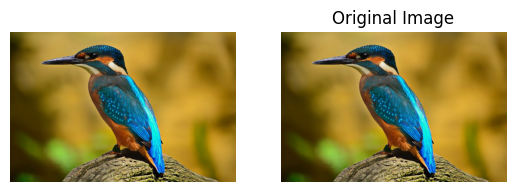

In [41]:
im = cv2.imread('images/bird.png')
im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
plot_image(im, 'Original Image')

## Scaling

We have different interpolation techniques available that are used to resize an image from one pixel grid to another. Preferable methods are:

cv2.INTER_AREA -> shrinking

cv2.INTER_CUBIC (slow), cv2.INTER_LINEAR -> zooming

cv2.INTER_LINEAR -> default for both

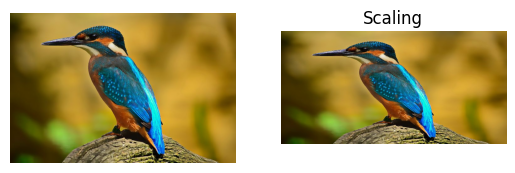

In [42]:
im1 = cv2.resize(im, (512, 256), interpolation = cv2.INTER_CUBIC)
plot_image(im1, 'Scaling')

## Reflection

For reflection, we will use the same procedure as scaling, but we will only manipulate the y-coordinates (we will make them negative).

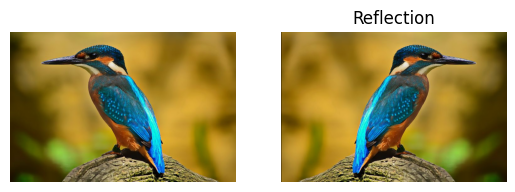

In [53]:
rm = np.float32([[-1,0,im.shape[1]],
                 [0,1,0],
                 [0,0,1]])
im1 = cv2.warpPerspective(im, rm, im.shape[:-1][::-1])
plot_image(im1, 'Reflection')

## Translation 

Translation dealts with shifting an object's location. If we want to shift an image by ($t_{x}$, $t_{y}$) in the direction $(x, y)$, we have the transformation matrix as the identity matrix with the third column representing the $t_{x}$ and $t_{y}$.

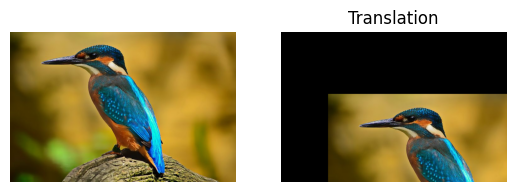

In [44]:
tm = np.float32([[1, 0, 150],
                 [0, 1, 200]])
im1 = cv2.warpAffine(im, tm, (im.shape)[:2][::-1])
plot_image(im1, 'Translation')

## Rotation

For rotation, we know following the transformation matrix:

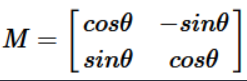

However, OpenCV provides scaled rotation with adjustible center of rotation, so the modified matrix becomes:

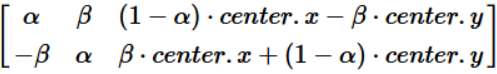

, where
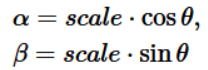

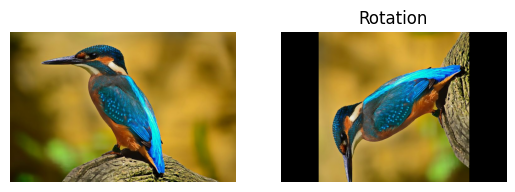

In [45]:
tm = cv2.getRotationMatrix2D(center= (im.shape[1]/2, im.shape[0]/2), 
                             angle=90,
                             scale=1)
im1 = cv2.warpAffine(im, tm, im.shape[:2][::-1])
plot_image(im1, 'Rotation')

## Shear

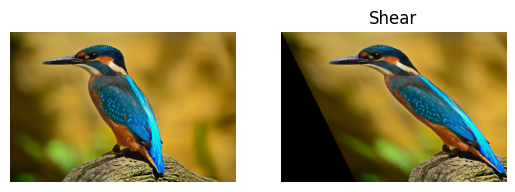

In [66]:
sm = np.float32([[1, 0.5, 0],
                 [0, 1, 0],
                 [0, 0, 1]])
im1 = cv2.warpPerspective(im, sm,im.shape[:-1][::-1])
plot_image(im1, 'Shear')

## Affine

In affine transformations, all parallel lines are preserved. For the same, we have to take 3 points and their transformed co-ordinates.

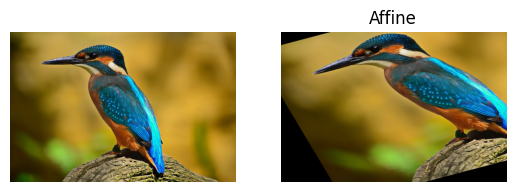

In [46]:
tm = cv2.getAffineTransform(np.float32([[50, 50], [200, 50], [50, 200]]),
                            np.float32([[10, 100], [200, 50], [100, 250]]))
im1 = cv2.warpAffine(im, tm, im.shape[:2][::-1])
plot_image(im1, 'Affine')

# End